<img src="img/usmlogo.png" style="float:right;height:85px"> <img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Laboratorio 1 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Renato Bassi Castillo ; 201773521-K ; Malla Nueva </h4>
    <h4> Joaquín Castillo Tapia ; 201773520-1 ; Malla Nueva </h4>
</center>
<p>
<center><h4>Mayo 2019</h4></center>
</p>

---
# 1. Retención de Clientes
>a) Haga un análisis exploratorio **a su criterio** del dataset y extraiga 3 conclusiones acerca del conjunto de datos

**R.-** Para el análisis de los datos entregados se construirán tres gráficos y dos histogramas a modo de resumen. Se concluirá en base a lo observado.

## Desarrollo

Se procede a extraer los datos que serán utilizados en la construcción de las gráficas.

In [2]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline 

D={}
D['IS_3']=0
D['IS_2']=0
D['IS_1']=0
D['IS_0']=0

D['SC_I']=0
D['SC_T']=0

D['C_I']=0
D['C_T']=0

Dm_SC={}
Dm_C={}


with open('churn.csv', newline='') as File:  
    reader = csv.reader(File)
    for line in reader:
        if (line[8] == 'DSl' or line[8] == 'Fiber optic'):
            if(line [9] == 'Yes'):
                if(line [10] == 'Yes'):
                    if(line [11] == 'Yes'):
                        D['IS_3']+=1
                    else:
                        D['IS_2']+=1
                else:
                    if(line [11] == 'Yes'):
                        D['IS_2']+=1
                    else:
                        D['IS_1']+=1
            else:
                if(line [10] == 'Yes'):
                    if(line [11] == 'Yes'):
                        D['IS_2']+=1
                    else:
                        D['IS_1']+=1
                else:
                    if(line [11] == 'Yes'):
                        D['IS_1']+=1
                    else:
                        D['IS_0']+=1
                        
            if (line[2] == '1'):
                D['SC_I']+=1
            elif (line[2] == '0'):
                D['C_I']+=1
        if (line[2]=='1'):
            if (line[6]=='Yes'):
                D['SC_T']+=1
                
            if(int(line[5]) not in Dm_SC):
                Dm_SC[int(line[5])]=0
            Dm_SC[int(line[5])]+=1
        elif(line[2]=='0'):
            if (line[6]=='Yes'):
                D['C_T']+=1
                
            if(int(line[5]) not in Dm_C):
                Dm_C[int(line[5])]=0
            Dm_C[int(line[5])]+=1
        

### Funciones a utilizar

**Grafico(list L1, list L2, str title, str x_name, str y_name)**

Funcíon que grafica los datos entregados en la lista L1, que son etiquetados con los str presentes en la lista L2, se proporciona además el titulo del gráfico y los nombres de cada eje.

In [4]:
def Grafico(L1,L2,title,x_name,y_name):
    
    x=L2
    y=L1


    y_pos = np.arange(len(y))
    performance = x

    plt.barh(y_pos, y, align='center', alpha=0.5)
    plt.yticks(y_pos, x)
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    plt.title(title)

    plt.show()

**Histograma(dict D, str title, str x_name, str y_name)**

Función que construye un histograma con los datos almacenados en el diccionario, el valor corresponde a la frecuancia de su respectiva llave. Adéma se proporciona los str de título y de los ejes del gráfico.

In [57]:
def Histograma(D,title,x_name,y_name):
    x=[]
    y=[]

    for i in D.items():
        x.append(int(i[0]))
        y.append(i[1])

    valor_max = max(x)
    valor_min = min(x)
    
    fr_max = max(y)
    fr_min = min(y)

    k = int(np.log2(len(D)+1))

    plt.hist(x,len(D),(valor_min, valor_max),False,y)

    plt.axis([valor_min, valor_max, fr_min,fr_max])
    plt.title(title)
    plt.ylabel(y_name)
    plt.xlabel(x_name)

    plt.show()

### Construcción y Análisis

Se grafica la cantidad de clientes con servicio de Internet y con servicio de Telefonía respecto a los grupos de Adulto mayor y cliente común.

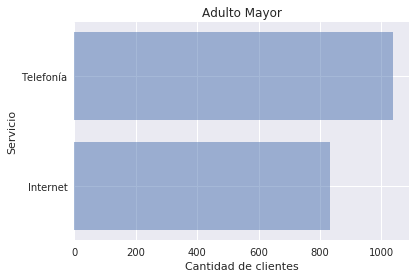

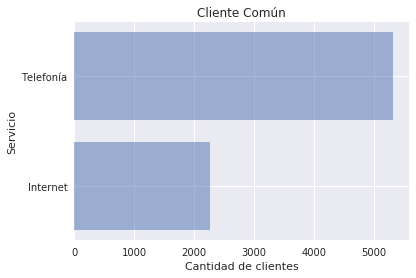

In [6]:
Grafico([D['SC_I'],D['SC_T']],['Internet','Telefonía'],'Adulto Mayor','Cantidad de clientes','Servicio')
Grafico([D['C_I'],D['C_T']],['Internet','Telefonía'],'Cliente Común','Cantidad de clientes','Servicio')

Se observa, a simple vista, que en ambos grupos predomina el sercio telefoníco. Esto se puede deber a varios factores, uno de ellos es, probablemente, la calidad de los servicios, pues si un servicio en una compañía ano cumple los estándares del cliente este no tendrá muchos clientes. En este caso se podŕia decir que la empresa es conocida por sus servicios telefónicos, y que sus servicios de internet no son conocidos o de calidad.

Particularmete se observa que los Adultos Mayores tienden a contratar más servicios Telefónicos que servicios de Internet, esto se debe principalemte a que ellos no están relacionados con la tecnología de hoy en día en donde el Internet es fundamental. Por lo tanto, no es sorprendente esta diferencia.

En cuanto a los Cliente Comunes, se observa una gran diferencia entre los servicios contratados. Pues hay una diferencia de aproximadamente 3000 clientes con servicio de Internet en comparación a la cantidad de clientes con servicio Telefónico. Esto avala la explicación dada en primera instancia, en dónde se deduce que la compañía es más conocida por sus servicios de Telefonía que por sus servicios de Internet, ya que, en comparación a los adultos mayores estos clientes si están relacionados con las nuevas tecnologías. 

___
A continuación se grafica la cantidad de clientes respecto a la cantidad de servicios en seguridad de Internet contratados.

_ + Se entiende como servicio de seguridad: Online Security, Online Backup y Device Protection_

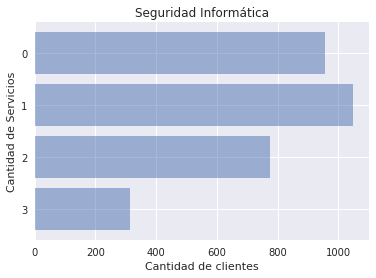

In [7]:
Grafico([D['IS_3'],D['IS_2'],D['IS_1'],D['IS_0']],['3','2','1','0'],'Seguridad Informática','Cantidad de clientes','Cantidad de Servicios') 

Se observa en el gráfico que hay poco más de 300 clientes que contrataron los 3 servicios de seguridad, y que la mayoría de los clientes prefieren tener sólo un servicio de seguridad contratado (sobre los 1000 clientes). Dándose a entender que las personas no están muy preocupada por sus datos o dispositivos tecnológicos, esto se puede deber, principalmente, a que los clientes no tienen datos importantes que proteger, y utilizan los servicios para recreammiento y comunicación, y no para almacenar y compartir información delicada. Esto se refuerza al observar que hay maś de 900 clientes que no cuentan con servicio de seguridad, y poco más de 700 clientes que sólo contratan dos servicios. 

___
Se construyen dos histogramas en base a la cantidad de meses como clientes en la compañía. Los datos se dividen en dos grupos, Adulto Mayor y Cliente Común.

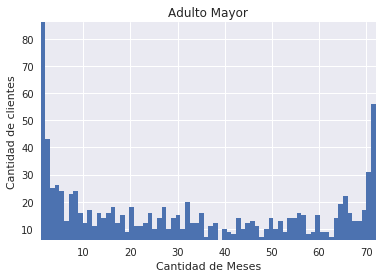

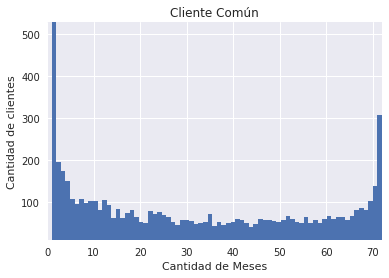

In [58]:
Histograma(Dm_SC,'Adulto Mayor','Cantidad de Meses','Cantidad de clientes')
Histograma(Dm_C,'Cliente Común','Cantidad de Meses','Cantidad de clientes')

Al simple vista, se observa una distribución de datos similar entre los dos grupos de clientes, pero en distintas cantidades. Esto denota que ambos grupos se comportan igual en realación a la cantidad de meses con algún servicio de la compañía. En ambos grupos predominan los cleintes nuevos (1 mes como cleinte), pero estos son seguidos en cantidad por los clientes más fieles (sobre los 70 meses como cliente). Esto indica que la empresa tiene un bajo nivel de retención de clientes después del primer mes, esto ya que la cantidad de clientes baja abruptamente, pero también nos indica que los clientes que se quedan después del primer mes se mantienen constantes por mucho tiempo, pues se observa una frecuencia nivelada entre los meses 2 y 70. Es necesario destacar que esta nievlación no se cumple del todo en el grupo de Adultos Mayores, indicando que la retención de este tipo de clientes es más variable.



> b.1) Determine la probabilidad de que: <ul>
    <li>Un cliente sea mujer dado que tiene fibra óptica </li>
    <li>Un cliente sea hombre dado que tiene fibra óptica</li>
    <li>Un cliente sea mujer dado que no tiene fibra óptica</li>
    <li>Un cliente sea hombre dado que no tiene fibra óptica</li>
    </ul>
    Además indique cuál/es de estos pares deben sumar 1 (Si es que algún par debe sumar esta cantidad). Justifique su respuesta.
    

**R.-** Para calcular estas probabilidades se extraeran los datos necesarios y se utilizará la teoría de probabilidad clásica.

## Desarrollo

### Extración de Datos


In [9]:
C_Fop = 0
C_mjrFop = 0
C_hbrFop = 0

C_NFop = 0
C_mjrNFop = 0
C_hbrNFop = 0

T_datos = 0 

with open('churn.csv', newline='') as File:  
    reader = csv.reader(File)
    for line in reader:
        if(line[1]=="Female"):
            T_datos+=1
            if(line[8]=='Fiber optic'):
                C_mjrFop+=1
                C_Fop+=1
            else:
                C_NFop+=1
                C_mjrNFop+=1
                
        elif(line[1]=='Male'):
            T_datos+=1
            if(line[8]=='Fiber optic'):
                C_hbrFop+=1
                C_Fop+=1
            else:
                C_NFop+=1
                C_hbrNFop+=1
        

### Trabajo de datos y respuestas

In [10]:
P_Fop = C_Fop/T_datos
P_mjrFop = C_mjrFop/T_datos
P_hbrFop = C_hbrFop/T_datos

P_NFop = C_NFop/T_datos
P_mjrNFop = C_mjrNFop/T_datos
P_hbrNFop = C_hbrNFop/T_datos


Aplicando la teroría de probabilidad condicional se obtienen los siguientes resultados:

___
<li>Un cliente sea mujer dado que tiene fibra óptica: </li>

In [11]:
M_F = P_mjrFop/P_Fop
print(M_F)

0.5016149870801033


___
<li>Un cliente sea hombre dado que tiene fibra óptica:</li>

In [12]:
H_F = P_hbrFop/P_Fop
print(H_F)

0.4983850129198967


___
<li>Un cliente sea mujer dado que no tiene fibra óptica:</li>

In [13]:
M_NF = P_mjrNFop/P_NFop
print(M_NF)

0.49024575627058525


___
<li>Un cliente sea hombre dado que no tiene fibra óptica:</li>

In [14]:
H_NF = P_hbrNFop/P_NFop
print(H_NF)

0.5097542437294148


___
En base a la Teoría de Probabilidades y los axiomas fundamenteales, los cuales indican que la probalidad de la no ocurrencia de A es igual a uno menos la probabilidad de ocurrencia de A ( _P(A') = 1 - P(A)_ ), se deduce que los pares que deben sumar 1 son los que difieren en el genero del cliente, es decir, hombre dado que tiene fibra óptica con mujer dado que tiene fibra óptica, y hombre dado que no tiene fibra óptica con mujer dado que no tiene fibra óptica.

Para comprobarlo se suman los valores encontrados:

P(H | Fop) + P(M | Fop) = 

In [62]:
print(H_F+M_F)

1.0


P(H | Fop') + P(M | Fop') = 

In [63]:
print(H_NF+M_NF)

1.0


>b.2) ¿Es posible concluir que si un cliente es hombre tiene más probabilidad de tener fibra óptica? ¿Y si es mujer? ¿Por qué?

**R.-** Para dar respuesta a estas prefuntas, calcularemos la probabilidad de ser tener fibra óptica y la probabilidad de tener DSl dado que es hombre y dado que es mujer.

## Desarrollo

### Extracción de datos

In [64]:
C_mjr = 0
C_hbr = 0

C_mjrDSL = 0
C_hbrDSL = 0


with open('churn.csv', newline='') as File:  
    reader = csv.reader(File)
    for line in reader:
        if (line[1]=='Female'):
            C_mjr+=1
            if (line[8]=='DSL'):
                C_mjrDSL+=1
        elif (line[1]=='Male'):
            C_hbr+=1
            if (line[8]=='DSL'):
                C_hbrDSL+=1
                
P_mjr = C_mjr/T_datos
P_hbr = C_hbr/T_datos

P_mjrDSL = C_mjrDSL/T_datos
P_hbrDSL = C_hbrDSL/T_datos

### Resultados y Respuestas

Probabilidad de tener fibra óptica dado que el cliente es hombre:

In [17]:
F_H = P_hbrFop/P_hbr
print(F_H)

0.4340365682137834


Probabilidad de tener conección DSL dado que el cliente es hombre:

In [18]:
D_H = P_hbrDSL/P_hbr
print(D_H)

0.3468354430379747


En base a los resultados se puede decir que sí, que el cliente sea hombre es un buen predictor de tener fibra ótica, pues el valor encontrad (0.43) indica que la mayoría de los hombres poseen este tipo de servicio en comparación al valor encontrado para el tipo de conección DSL (0.34).

___
Probabilidad de tener fibra óptica dado que el cliente es mujer:

In [19]:
F_M = P_mjrFop/P_mjr
print(F_M)

0.4452408256880734


Probabilidad de tener conección DSL dado que el cliente es mujer:

In [20]:
D_M = P_mjrDSL/P_mjr
print(D_M)

0.34059633027522934


En cuanto a los clientes de genero femenino, también es un buen predictor del servicio de fibra óptica. Pues el valor encontrado (0.46) es significativo en comparación a la probabilidad de tener conección DSL (0.34). Por ende es más probable encontrar una mujer con fibra óptica que una con conección DSL.

>c) Utilizando criterios de probabilidad condicional ¿Hay algún servicio de internet más propenso a la fuga?

**R.-** Para responder la pregunta se calculará la probabilidad de fuga dado tener fibra óptica y la probabilidad de fuga dado tener conección DSL.

## Desarrolllo

### Extracción de datos

In [22]:
C_Fop = 0
C_DSL = 0

C_Fopf = 0
C_DSLf = 0

with open('churn.csv', newline='') as File:  
    reader = csv.reader(File)
    for line in reader:
        if (line[8] == 'DSL'):
            C_DSL+=1 
            if (line[20] == 'Yes'):
                C_DSLf+=1
        elif (line[8] == 'Fiber optic'):
            C_Fop+=1 
            if (line[20] == 'Yes'):
                C_Fopf+=1

P_Fop = C_Fop/T_datos
P_DSL = C_DSL/T_datos

P_Fopf = C_Fopf/T_datos
P_DSLf = C_DSLf/T_datos

### Trabajo de datos y Respuesta

Probabilidad de fuga dado tener fibra óptica:

In [67]:
F_Fop = P_Fopf/P_Fop
print(F_Fop)

0.4189276485788114


Probabilidad de fuga dado tener fibra óptica:

In [25]:
F_DSL = P_DSLf/P_DSL
print(F_DSL)

0.18959107806691447


En base a la información encontrada se puede decir que el servicio de fibra óptica es más propensa a la fuga que el servicio de DSL. Esto, ya que la probabilidad de fuga dado tener fibra óptica es de _0.42_ y la probabilidad de fuga dado tener conección DSL es de _0.19_.

>d) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la fuga? y ¿es la fuga un buen predictor del cargo mensual de un cliente?

**R.-** Para el desarrollo de está respuesta se clasificaron los datos de Cargo Mensual en 4 grupos, menor o igual a 25, mayor a 25 y menor o igual a 50, mayor a 50 y menor o igual a 75, mayor a 75 y menor o igual a 100, y mayor a 100. Con estos se construyeron dos graficos de barra con las probabilidades correspondientes.

## Desarrollo

### Extracción de datos

In [91]:
D_CM = {}
D_CM[25] = 0
D_CM[50] = 0
D_CM[75] = 0
D_CM[100] = 0
D_CM[101] = 0

C_F = 0

D_CMF = {}
D_CMF[25] = 0
D_CMF[50] = 0
D_CMF[75] = 0
D_CMF[100] = 0
D_CMF[101] = 0

with open('churn.csv', newline='') as File:  
    reader = csv.reader(File)
    for line in reader:
        if (line[18] != 'MonthlyCharges'):
            if ( float(line[18]) <= 25):
                D_CM[25]+=1
                if (line[20] == 'Yes'):
                    D_CMF[25]+=1
            elif ( float(line[18]) <= 50):
                D_CM[50]+=1
                if (line[20] == 'Yes'):
                    D_CMF[50]+=1
            elif ( float(line[18]) <= 75):
                D_CM[75]+=1
                if (line[20] == 'Yes'):
                    D_CMF[75]+=1
            elif ( float(line[18]) <= 100):
                D_CM[100]+=1
                if (line[20] == 'Yes'):
                    D_CMF[100]+=1
            else:
                D_CM[101]+=1
                if (line[20] == 'Yes'):
                    D_CMF[101]+=1

            if (line[20] == 'Yes'):
                C_F+=1

### Trabajo de datos y Respuesta

Probabilidad de fuga dado que el Cargo Mensual del cliente:

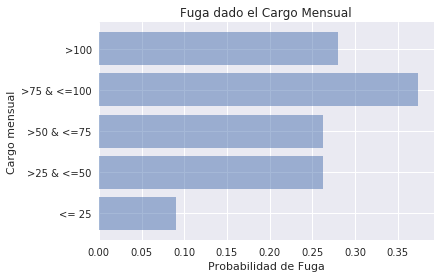

In [92]:
L1 = [D_CMF[25]/D_CM[25],D_CMF[50]/D_CM[50],D_CMF[75]/D_CM[75],D_CMF[100]/D_CM[100],D_CMF[101]/D_CM[101]]
L2 = ['<= 25','>25 & <=50','>50 & <=75','>75 & <=100','>100']
Grafico(L1,L2,'Fuga dado el Cargo Mensual','Probabilidad de Fuga','Cargo mensual')

Se observa a simple vista que el cargo mensual es un buen predictor de la fuga, pues los clientes tienden a fugarse cuando su cargo mensual está por sobre las 25 unidades, ya que debajo de ese valor la probabilidad no supera el valor de  0.1 dando a entender que es muy poco probable de un cliente se fugue dentro de ese rango. No así el rango entre las 75 y 100 unidades, el cual presenta la mayor probabilidad de fuga, superando el valor de 0.35.

___
Probabilidad del cargo mensual dado la fuga del cliente:

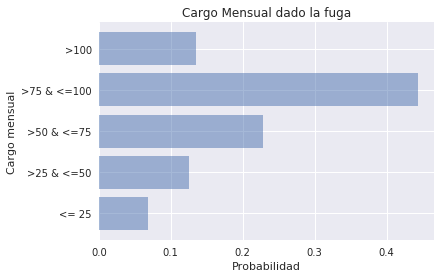

In [99]:
L1 = [D_CMF[25]/C_F,D_CMF[50]/C_F,D_CMF[75]/C_F,D_CMF[100]/C_F,D_CMF[101]/C_F]
L2 = ['<= 25','>25 & <=50','>50 & <=75','>75 & <=100','>100']
Grafico(L1,L2,'Cargo Mensual dado la fuga','Probabilidad','Cargo mensual')

Este gráfico se puede interpretar como la cantidad de unidades perdidas en el mes caundo un cliente se fuga, ya que es el cargo mensual que no será pagado. En relacipon a esto, es muy probable que el monto perdido sea entre 75 y 100 unidades, ya que la probabilidad deque esto suceda supera el 0.4. Además es preciso notar, que al fugarse un cliente es muy probable perder más de 25 unidades, ya que es en ese tramo ([>25 - >100]) en donde se concentran las probabilidades. Por lo tanto, es posible decir que la fuga es un buen predictor del cargo mensual, pero no tanto como lo es el cargo mesnual para la fuga.

>e) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la estadia de un cliente? y ¿es la estadia del cliente un buen predictor del cargo mensual de este?

**R.-** Para responder esta pregunta se analizarán los gráficos construidos respecto a 4 fltros de estadía y 5 filtros de cargo mensual.

## Desarrollo

### Funciones a utilizar

**Aumentar(list L, float x)**

Función que recibe una lista L de 6 variables tipo int y suma 1 a uno de ellas respecto al valor de la variable x.

In [136]:
def Aumentar(L,x):
    L[0]+=1
    if (x <= 25):
        L[1]+=1
    elif (x <= 50):
        L[2]+=1
    elif (x <= 75):
        L[3]+=1
    elif (x <= 100):
        L[4]+=1
    else:
        L[5]+=1

### Extracción de datos

In [137]:
D_E = {}
D_E[6] = [0,0,0,0,0,0]
D_E[12] = [0,0,0,0,0,0]
D_E[24] = [0,0,0,0,0,0]
D_E[25] = [0,0,0,0,0,0]


with open('churn.csv', newline='') as File:  
    reader = csv.reader(File)
    for line in reader:
        if (line[5] != 'tenure'):    
            if (int(line[5]) <= 6):
                Aumentar(D_E[6], float(line[18]))
            elif(int(line[5]) <= 12):
                Aumentar(D_E[12], float(line[18]))
            elif(int(line[5]) <= 24):
                Aumentar(D_E[24], float(line[18]))
            else:
                Aumentar(D_E[25], float(line[18]))
    

### Trabajo de datos y Respuestas

Probablilidad de Estadía dado un Cargo Mensual menor o igual a 25

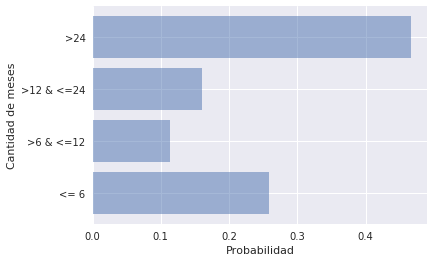

In [140]:
L1 = [D_E[6][1]/D_CM[25],D_E[12][1]/D_CM[25],D_E[24][1]/D_CM[25],D_E[25][1]/D_CM[25]]
L2 = ['<= 6','>6 & <=12','>12 & <=24','>24']
Grafico(L1,L2,'','Probabilidad','Cantidad de meses')

Se observa que dado un bajo Cargo Mensual la probabilidad de estadía se muestra alta para un tiempo mayor a 24 meses superando los 0.4, y además se muestra una alta probabilidad de estadía de meses menor a 6, alcanzando un valor superior a los 0.25.

___
Probablilidad de Estadía dado un Cargo Mensual mayor a 25 y menor o igual a 50:

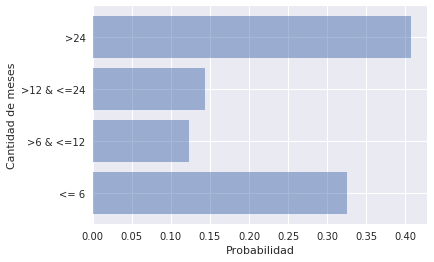

In [141]:
L1 = [D_E[6][2]/D_CM[50],D_E[12][2]/D_CM[50],D_E[24][2]/D_CM[50],D_E[25][2]/D_CM[50]]
L2 = ['<= 6','>6 & <=12','>12 & <=24','>24']
Grafico(L1,L2,'','Probabilidad','Cantidad de meses')

Se observa que, al igual que el caso anterior, predomina la probabilidad de estadía mayor a 24 meses pero con un valor que apenas supera los 0.4, seguido de la estadía menor a 6 meses con un valor superior a 0.3, más alto que el caso anterior.

___
Probablilidad de Estadía dado un Cargo Mensual mayor a 50 y menor o igual a 75:

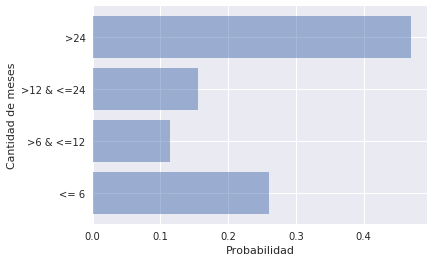

In [142]:
L1 = [D_E[6][3]/D_CM[75],D_E[12][3]/D_CM[75],D_E[24][3]/D_CM[75],D_E[25][3]/D_CM[75]]
L2 = ['<= 6','>6 & <=12','>12 & <=24','>24']
Grafico(L1,L2,'','Probabilidad','Cantidad de meses')

Observamos una distribución similar a los casos anteriores en donde predomina la estadía mayor a 24 meses con una probailidad superior a 0.4, seguida de la estadía menor a 6 meses, esta vez, con un valor por debajo de 0.3.

___
Probablilidad de Estadía dado un Cargo Mensual mayor a 75 y menor o igual a 100:

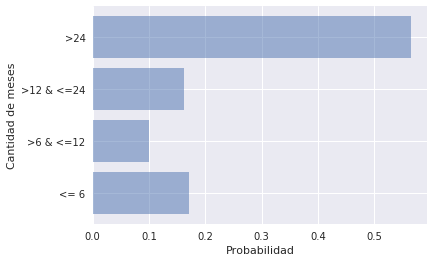

In [143]:
L1 = [D_E[6][4]/D_CM[100],D_E[12][4]/D_CM[100],D_E[24][4]/D_CM[100],D_E[25][4]/D_CM[100]]
L2 = ['<= 6','>6 & <=12','>12 & <=24','>24']
Grafico(L1,L2,'','Probabilidad','Cantidad de meses')

Esta vez se observa una diferencia más amplia que en los casos anteriores, ya que la probabilidad de superar los 24 meses es mayor a 0.5, lo que indica que hay bajas probabilidades que la estadía sea menor a 2 años. A pesar de esta diferencia, se siguie viendo una distribución similar a los casos anteriores.

___
Probablilidad de Estadía dado un Cargo Mensual mayor a 100:

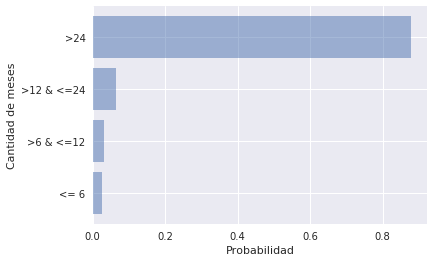

In [144]:
L1 = [D_E[6][5]/D_CM[101],D_E[12][5]/D_CM[101],D_E[24][5]/D_CM[101],D_E[25][5]/D_CM[101]]
L2 = ['<= 6','>6 & <=12','>12 & <=24','>24']
Grafico(L1,L2,'','Probabilidad','Cantidad de meses')

Se observa una predominancia total de la estadía mayor a 24 meses con una probabilidad sobre 0,8, convirtiendose en una buena predicción de la estadía ya que es altamente probable que al tener un cargo mensual superior a los 100 se obtenga una estadía mayor a 24 meses.

En base a lo observado en los gráficos, el cargo mensual es un buen predictor sólo para cargos mayores a 100, ya que es el úni qe muestra una clara tendencía a un rango en específico. En cuanto alos otros casos de Cargo Mensual esyos no nos ayudan mucho, ya que todos tiienen una distribución similar y variable, por tanto, no se consideran buenos predictores.

___

Probabilidad de Cargo Mensual dada una Estadía menor o igual a 6 meses:

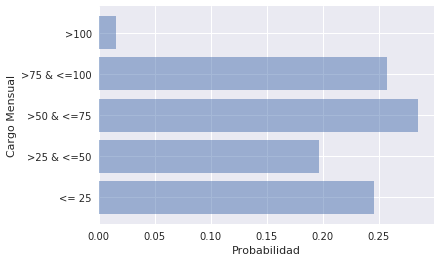

In [145]:
L1 = [D_E[6][1]/D_E[6][0],D_E[6][2]/D_E[6][0],D_E[6][3]/D_E[6][0],D_E[6][4]/D_E[6][0],D_E[6][5]/D_E[6][0]]
L2 = ['<= 25','>25 & <=50','>50 & <=75','>75 & <=100','>100']
Grafico(L1,L2,'','Probabilidad','Cargo Mensual')

Se observa una gran probabilidad en los rangos inferiores al Cargo Mensual de 100, indicando que para clientes que llevan a lo más 6 meses hay baja probabiñidad que estos tengan un Cargo mensual superior a 100.

___
Probabilidad de Cargo Mensual dado una estadía mayor a 6 meses y menor a un año:

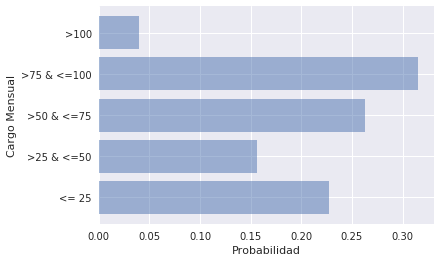

In [146]:
L1 = [D_E[12][1]/D_E[12][0],D_E[12][2]/D_E[12][0],D_E[12][3]/D_E[12][0],D_E[12][4]/D_E[12][0],D_E[12][5]/D_E[12][0]]
L2 = ['<= 25','>25 & <=50','>50 & <=75','>75 & <=100','>100']
Grafico(L1,L2,'','Probabilidad','Cargo Mensual')

Al igual que el caso anterior sólo es posible extraer que dado un rango de tiempo entre 6 y 12 meses de estadía hay pocas probablilidades de que el Cargo Mensual sea mayor a 100.

___
Probabilidad de Cargo Mensual dado una estadía mayor a un año y menor a dos años:

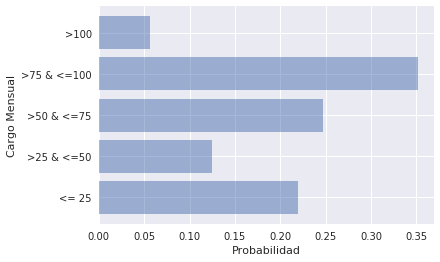

In [147]:
L1 = [D_E[24][1]/D_E[24][0],D_E[24][2]/D_E[24][0],D_E[24][3]/D_E[24][0],D_E[24][4]/D_E[24][0],D_E[24][5]/D_E[24][0]]
L2 = ['<= 25','>25 & <=50','>50 & <=75','>75 & <=100','>100']
Grafico(L1,L2,'','Probabilidad','Cargo Mensual')

Se observa, en compraración a los gráficos anteriores, una disminución en la probabilidad de que el Cargo Mensual este entre los 25 y 50, admás de un leve aumento en la probabilidad de Cargos Mensuales mayores a 100. 

___
Probabilidad de Cargo Mensual dado una estadía mayor a dos años:

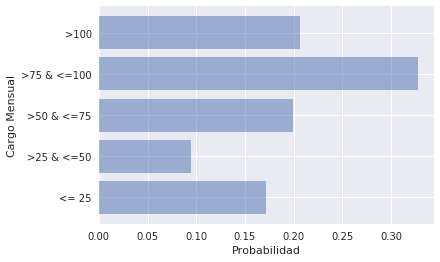

In [148]:
L1 = [D_E[25][1]/D_E[25][0],D_E[25][2]/D_E[25][0],D_E[25][3]/D_E[25][0],D_E[25][4]/D_E[25][0],D_E[25][5]/D_E[25][0]]
L2 = ['<= 25','>25 & <=50','>50 & <=75','>75 & <=100','>100']
Grafico(L1,L2,'','Probabilidad','Cargo Mensual')

Se observa una gran variación entre las probabilidades de cada rango de Cargo Mensual, lo que imposibilita una predicción acertada del valor que tomará dado una estadía mayor a los 2 años.

En Resumen, según la clasificación utilizada, la estadía no es un buen predictor del cargo mensual, pues en ningún intervalo se puede predecir con una probabilidad mayor a 0.4 el cargo mensual dada una estadía. Además las probabilidades en todos los casos varían en pequeñas cantidades, indicando que todas las opciones tiene altas probabilidades de ocurrir, dificultando así la predicción.

# 2. Máquina de Rube Goldberg

>a) Usted quiere subir su máquina de Rube Goldberg a Youtube™, estime cuántas veces (en promedio) tendrá que poner en marcha su máquina hasta que resulte por primera vez en video. A su vez, haga un gráfico mostrando la probabilidad de no tener éxito en función del número de puestas en marcha de la máquina y comente.

## Desarrollo

### Funciones a utilizar

**nCr(int n, int r)**

Función que retorna la combinatoria correspondiente a n sobre r.

In [ ]:
def nCr(n,r):
    f = math.factorial
    return f(n) // f(r) // f(n-r)

### Trabajo de datos y Respuestas

In [153]:
import random 
import math


probC = 2.0/5
probL = 0.6*(1-probC)
probA = 0.8*probL
probI = (6.0/9)*probA
probE = 0.3*probI


i=0
ct=0
n= 100
while(i<100000):  
    cj=0
    j=0
    while(j<n):
        r = random.random()*n
        if (r<=probE*n):
            cj+=j
            break
        j+=1
    ct+=cj
    i+=1

La cantidad mínima de intentos para que salga correcto es:

In [154]:
print(ct/100000.0)

16.01318


El gráfico de Probabilidad de falla en base a la cantidad de intentos es:

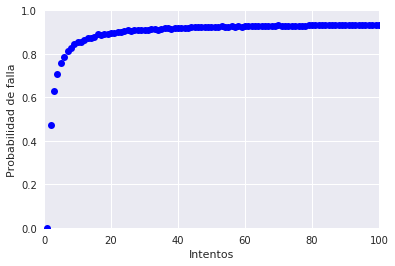

In [281]:
def media(n):
    i=0
    ct=0

    while(i<1000):  
        cj=0
        j=0
        while(j<n):
            r = random.random()*n
            if (r>=probE*n):
                cj+=j
            j+=1

        ct+=cj
        i+=1
    return ct/(500*n)

plt.xlabel("Intentos")
plt.ylabel("Probabilidad de falla")
plt.axis([0,100, 0, 1])
i=0
n=100
while(i<n):
    i+=1
    plt.plot(i, media(i)/i, 'bo')
    
plt.show()

Se observa en el gráfico, que a medida que aumenta la cantidad de intentos tambien aumenta la Probabilidad de falla. Pero esta probabilidad tiende a una probabilidad constante de 0.94, es decir, que para cantidades altas de intentos, la probabilidad de falla será aproximadamente un 94%.

> b) Si usted cuenta con 1000 bolitas, estime tanto téorica como empíricamente cuántas bolitas fallan en cada estapa. Compare sus resultados obtenidos.

## Téoricamente

Primera etapa:

In [171]:
probC = 2.0/5
pobl = 1000
print(probC*pobl)

400.0


___
Segunda etapa:

In [172]:
probL = 0.6
pobl = pobl-probC*pobl
print((1-probL)*pobl)

240.0


___
Tercera etapa:

In [173]:
probA = 0.8
pobl = pobl-(1-probL)*pobl
print((1-probA)*pobl)

71.99999999999999


___
Cuarta etapa:

In [174]:
probI = (6.0/9)
pobl = pobl-(1-probA)*pobl
print((1-probI)*pobl)

96.00000000000001


___
Quinta etapa:

In [176]:
probE = 0.3
pobl = pobl-(1-probI)*pobl
print((1-probE)*pobl)

134.39999999999998


## Empíricamente

### Funciones a utilizar

**aleatorio(float p, int n)**

Función que recibe una probabilidad p y una cantidad de población n, y en base a la probabilidad reduce la población.

In [248]:
def aleatorio(p, n):
    i = 0
    lista = []
    while (i < 100):
        lista.append(0)
        i += 1
        
    i = 0
    while (i < p*100):
        lista[i] = 1
        i += 1
        
    i = 0
    total = 0
    while (i < n):
        x = random.choice(lista)
        total += x
        i+=1
    
    return total


Primera etapa:

In [251]:
pobl = 1000
print(aleatorio(probC, pobl))

398


___
Segunda etapa:

In [252]:
pobl = pobl-probC*pobl
print(aleatorio(1-probL, pobl))

232


___
Tercera etapa:

In [253]:
pobl = pobl-(1-probL)*pobl
print(aleatorio(1-probA, pobl))

73


___
Cuarta etapa:

In [254]:
pobl = pobl-(1-probA)*pobl
print(aleatorio(1-probI, pobl))

102


___
Quinta etapa:

In [255]:
pobl = pobl-(1-probI)*pobl
print(aleatorio(1-probE, pobl))

141


> c) Determine la función de probabilidad que rige este fenómeno según todos los estados posibles de la bolita

**R.-** Sea X la variable aleatoria que representa la etapa de la máquina. La función de probabilidad, dado un Recorrido de X igual a {1,2,3,4,5} es:

In [256]:
def funp(x):
    pobl = 1
    probC = 2.0/5.0
    probL = 0.6
    probA = 0.8
    probI = (6.0/9)
    probE = 0.3
    

    if (x == 1):
        return probC*pobl
    pobl = pobl-probC*pobl
    if x == 2:
        return (1-probL)*pobl
    
    pobl = pobl-(1-probL)*pobl
    if x == 3:
        return (1-probA)*pobl
    
    pobl = pobl-(1-probA)*pobl
    if x == 4:
        return (1-probI)*pobl
    
    pobl = pobl-(1-probI)*pobl
    if x == 5:
        return (1-probE)*pobl

P(X=1) = 

In [257]:
print(funp(1))

0.4


P(X=2) =

In [258]:
print(funp(2))

0.24


P(X=3) =

In [259]:
print(funp(3))

0.07199999999999998


P(X=4) =

In [260]:
print(funp(4))

0.09600000000000002


P(X=5) =

In [261]:
print(funp(5))

0.1344


Se presenta un gráfico de la función descrita

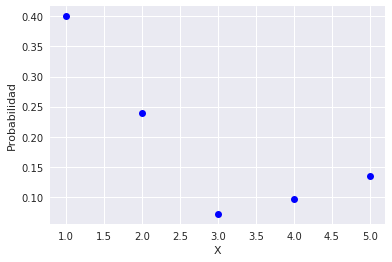

In [262]:
plt.plot(1, funp(1), 'bo')
plt.plot(2, funp(2), 'bo')
plt.plot(3, funp(3), 'bo')
plt.plot(4, funp(4), 'bo')
plt.plot(5, funp(5), 'bo')
plt.ylabel('Probabilidad')
plt.xlabel('X')
plt.show()

>d) Genere 1000 valores aleatorios que sigan la función de probabilidad que encontró en c), haga un histograma y compare con lo obtenido en b)

## Desarrollo

### Funciones a utilizar

**Histograma(dict D, int cant, int x_mx, int x_mn, int y_mx, str title, str x_name, str y_name)**

_Función que construye un Histograma a partir de los datos entregados en el diccionario **D**. _
_además recibe los limites de cada eje _(**x_mn**, **x_mx** y **y_mx**).  _El titulo del Histograma viene dado por el str title, y 
el nombre de cada eje viene dado por los str_  **x_name**  _para x, e _ **y_name para** _y._ 

In [266]:
def Histograma(D,cant,x_mx,x_mn,y_mx,title,x_name,y_name):
    x=[]
    y=[]

    for i in D.items():
        x.append(int(i[0]))
        y.append(i[1])

    valor_max = max(x)
    valor_min = min(x)


    fr_max = max(y)
    fr_min = min(y)

    rango = valor_max - valor_min

    k = int(np.log2(len(D)))

    Amplitud = rango/k 

    plt.hist(x,cant,(valor_min, valor_max),False,y)

    plt.axis([x_mn, x_mx, 0,y_mx])
    plt.title(title)
    plt.ylabel(y_name)
    plt.xlabel(x_name)

    plt.show()

### Creación de datos

In [271]:
v1 = 0
v2 = 0
v3 = 0
v4 = 0
v5 = 0
vt = 1000
n = vt
while(vt!=0):
    vt-=1
    a=aleatorio(funp(1), 1)
    if(a==0):
        a=aleatorio(funp(2), 1)
    else:
        v1+=1
        continue
    if(a==0):
        a=aleatorio(funp(3), 1)
    else:
        v2+=1
        continue
    if(a==0):
        a=aleatorio(funp(4), 1)
    else:
        v3+=1
        continue
    if(a==0):
        a=aleatorio(funp(5), 1)
    else:
        v4+=1
        continue
    if(a==0):
        a=0
    else:
        v5+=1
        continue

data = [(0 ,v1), (1, v2), (2, v3), (3,v4), (4,v5), (5,0)]
data = dict(data)

El Histograma resultante es:

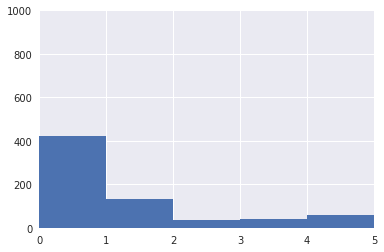

In [272]:
Histograma(data,5,5,0,n,'','','')

En comparación a lo encontrado en el inciso b, los resultados son, a simple vista, distintos. Ya que las cantidades difieren considerablemente. Aun Así, la tendencía de los datos se mantiene, esto quiere decir, que la probabilidad tiende a lo mostrado en ambas respuestas.

# 3. Perritos Enfermos

>a) ¿Es posible determinar **teóricamente** un $K$ tal que la cantidad de veces que se realiza la prueba sea la menor posible? De ser así, encuentre dicho K. ¿Qué distribución es comparable a este fenómeno?

La distribución que mejor representa el fenómeno descrito es la hipegeométrica, ya que se considera un población total de 500 perros de los cuales hay $N$ infectados, se toma una muestra de la población de $K$ perros y se desea saber cuál es la probabilidad de cuantos perros de ese grupo están infectados.

Para ejemplificar el fenómeno se construye un gráfico interactivo de la funció hipergeométrica, en el cual se puede variar la población total $M$ entre 0 y 500, la cantidad de perros infectados de 0 a 500, y la cantidad de perros que se toman para la muestra. El gráfico indica cuál es la probabilidad de que haya entre 0 y N infectados en la muestra.

In [352]:
from ipywidgets import interact 
import scipy.stats as stats 
def plot_serie(K, n, M):
    hipergeometrica = stats.hypergeom(M, n, K) # Distribución
    x = np.arange(0, n+1)
    fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad
  
    plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
    plt.axis([0, n, 0, 1])
    plt.title('Distribución Hipergeométrica')
    plt.ylabel('probabilidad')
    plt.xlabel('Cantidad de infectados')
    plt.plot(x, fmp, '--') 
    plt.show()
 
interact(plot_serie, K=(0,500), n=(0,500),M=(0,500))

A Jupyter Widget

<function __main__.plot_serie>

>b) Encuentre **empíricamente** un valor de $K$ que minimice la cantidad de veces que se realiza la prueba y compare con el obtenido en a)

**R.-** Para desarrollar empíricamente se hará una simulación a través de un a lista, la cual representara con ceros a los perros sanos, y con unos a los perros enfermos.

## Desarrollo

### Funciones a utilizar

**aleatorio2(int e, int t)**

Función que genera una lista de t ceros, y luego cambia, en posiciones aleatorias, e ceros por e unos. Al final retorna la lista resultante.

In [291]:
def aleatorio2(e,t):
    i = 0
    lista = []
    while (i < t):
        lista.append(0)
        i += 1
        
    i = 0
    while (i < e):
        p=np.random.randint(0,t)
        x=np.random.randint(0,2)
        if(lista[p]!=1 and x==1):
            lista[p]=x
            i+=1
    return lista

Se guarda en una lista todos los $K$ posibles que dividen 500 de manera exacta:

In [292]:
K=[]
for j in range(501):
    if(j!=0 and 500%j==0 ):
        K.append(j)

Se crea la lista con la que se trabajará:

In [339]:
t = aleatorio2(8,500)

Evaluamos la cantidad de pruebas totales por cada $K$ en la lista de divisores de 500. Guardamos el el $K$ que genera la mínima cantidad de pruebas.

In [340]:
cpmin=float('inf')
Kmin=0
for i in K:
    g=int(500/i)
    cp=0
    for j in range(g):
        tK=t[i*j:i*(j+1)]
        if(tK.count(1)>=1):
            cp+=i
    cp+=g
    if(cp<cpmin):
        cpmin=cp
        Kmin=i

El $K$ que genera la mínima antida de pruebas es:

In [341]:
print(Kmin)

10


Con un total de pruebas (en este caso particular) de:

In [342]:
print(cpmin)

130


>c) Ahora usted conoce la cantidad de perros infectados, realice el mismo experimento que en b) y compare sus resultados. ¿A qué se debe esta diferencia? 

**R.-** Al conocer la cantidad de perros infectados la prueba finalizará automaticamente al encontrarlos a todos. Es decir, cuando se encuentren los 8 perros infectados la prueba dejará de realizarse.

## Desarrollo

In [343]:
cpmin=float('inf')
Kmin=0
for i in K:
    g=int(500/i)
    cp=0
    ce=0
    for j in range(g):
        if(ce<8):
            tK=t[i*j:i*(j+1)]
            if(tK.count(1)>=1):
                cp+=i
                ce+=tK.count(1)
            cp+=1
    if(cp<cpmin):
        cpmin=cp
        Kmin=i

El $K$ que minimiza las pruebas es:

In [344]:
print(Kmin)

10


La cantidad total de pruebas, dado el $K$ encontrado es:

In [345]:
print(cpmin)

127


Se observa, al comparar con los resultados de b), que la cantidad de pruebas totales es menor. Esto se debe principalemte a que al encontrarse los 8 perros dejan de ralizarce las pruebas.